# Introducción al Aprendizaje Automático
Actividad Lección 1 || Fundamentos de IA y Machine Learning

Objetivos:
* Aplicar conceptos teóricos vistos en clase

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 09/10/2022

# Tabla de contenidos:
1. [Descarga de Iris Dataset](#descarga)
2. [Descripción de los datos](#descripcion)
3. [Realizar cálculos para cada atributo](#calculos)
    1. [Función Calcular Media](#media)
    2. [Función Calcular Desviación Típica](#std)
    3. [Función Calcular Mediana](#mediana)
    4. [Función Calcular Cuartiles](#cuartiles)
    5. [Función Calcular Mínimo](#minimo)
    6. [Función Calcular Máximo](#maximo)
4. [Visualizar la relación entre atributos](#relacion)
5. [Histograma de los atributos](#histograma)
6. [Recuperar valores perdidos](#recuperar)
7. [¿Es un dataset balanceado?](#balanceado)

# 1. Descarga de Iris Dataset <a class="anchor" id="descarga"></a>
Este cuaderno utiliza los datos del Iris Dataset obtenidos de [este repositorio](https://gist.github.com/netj/8836201)

# 2. Descripción de los datos <a class="anchor" id="descripcion"></a>
El Iris Dataset contiene 150 muestras de 3 especies (variables objetivo) de Iris (Iris setosa, Iris virginica e Iris versicolor). Cada muestra contiene 4 características (variables o atributos): longitud y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estas 4 características, se pretende predecir a qué especie pertenece cada muestra.

El creador del dataset, Ronald Fisher, lo utilizó para desarrollar un modelo de clasificación lineal en 1936. Más información sobre el dataset en [este enlace](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris).

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# 3. Realizar cálculos para cada atributo <a class="anchor" id="calculos"></a>
Para cada atributo, se calcula la media, la desviación típica, el mínimo, máximo y los cuartiles.

## Función Calcular Media <a class="anchor" id="media"></a>
En la función de calcular la media, se debe introducir la columna del atributo que se desea calcular la media. La función devuelve la media del atributo, siendo este un valor numérico.

La fórmula es la siguiente: $$\mu = \frac{\sum_{i=1}^{n} x_i}{n}$$

In [3]:
def calc_media(col_atributo):
    suma_total_attr = 0
    num_total_attr = 0
    for attr in col_atributo:
        suma_total_attr += attr
        num_total_attr += 1
    return suma_total_attr / num_total_attr

    # Método alternativo
    # return sum(col_atributo) / len(col_atributo)

In [4]:
print('Media sepal_length: ', calc_media(iris['sepal.length']))
print('Media sepal_width: ', calc_media(iris['sepal.width']))
print('Media petal_length: ', calc_media(iris['petal.length']))
print('Media petal_width: ', calc_media(iris['petal.width']))

Media sepal_length:  5.843333333333335
Media sepal_width:  3.057333333333334
Media petal_length:  3.7580000000000027
Media petal_width:  1.199333333333334


## Función Calcular Desviación Típica <a class="anchor" id="std"></a>
En la función de calcular la desviación típica, se debe introducir la columna del atributo que se desea calcular la desviación típica. La función devuelve la desviación típica del atributo, siendo este un valor numérico.

La fórmula es la siguiente: $$\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n}}$$

In [5]:
def calc_desviacion(col_atributo):
    media = calc_media(col_atributo)
    suma_total = 0
    num_total = 0
    for attr in col_atributo:
        suma_total += (attr - media) ** 2
        num_total += 1
    return (suma_total / num_total) ** 0.5

In [6]:
print('Desviación sepal_length: ', calc_desviacion(iris['sepal.length']))
print('Desviación sepal_width: ', calc_desviacion(iris['sepal.width']))
print('Desviación petal_length: ', calc_desviacion(iris['petal.length']))
print('Desviación petal_width: ', calc_desviacion(iris['petal.width']))

Desviación sepal_length:  0.8253012917851409
Desviación sepal_width:  0.43441096773549437
Desviación petal_length:  1.7594040657753032
Desviación petal_width:  0.7596926279021594


## Función Calcular Mediana <a class="anchor" id="mediana"></a>
En la función de calcular la mediana, se debe introducir la columna del atributo que se desea calcular la mediana. La función devuelve la mediana del atributo, siendo este un valor numérico.

La fórmula para calcular el índice de la mediana es la siguiente: $$\text{Mediana} = \begin{cases} \frac{n+1}{2} & \text{si n es impar} \\ \frac{\frac{n}{2} + \frac{n+2}{2}}{2} & \text{si n es par} \end{cases}$$


In [7]:
def calc_mediana(col_atributo):
    col_atributo = sorted(col_atributo)
    n = len(col_atributo)
    if n % 2 == 0:
        return (col_atributo[n // 2] + col_atributo[n // 2 - 1]) / 2
    else:
        return col_atributo[n // 2]

In [8]:
print('Mediana sepal_length: ', calc_mediana(iris['sepal.length']))
print('Mediana sepal_width: ', calc_mediana(iris['sepal.width']))
print('Mediana petal_length: ', calc_mediana(iris['petal.length']))
print('Mediana petal_width: ', calc_mediana(iris['petal.width']))

Mediana sepal_length:  5.8
Mediana sepal_width:  3.0
Mediana petal_length:  4.35
Mediana petal_width:  1.3


# Función Calcular Cuartiles <a class="anchor" id="cuartiles"></a>
En la función de calcular los cuartiles, se debe introducir la columna del atributo que se desea calcular los cuartiles. La función devuelve los cuartiles del atributo, siendo estos valores numéricos.

Para calcular los cuartiles es necesario calcular su índice: $$\text{Indice} = \begin{cases} \frac{P}{100}*n & \text{si n es impar} \\ \frac{P}{100}*(n+1) & \text{si n es par} \end{cases}$$

El cuartil 1 es el Percentil 25, el cuartil 2 o mediana es el Percentil 50 y el cuartil 3 es el Percentil 75.

Las formulas serían las siguientes: $$\text{Cuartil 1} = \begin{cases} 0.25 * n & \text{si n es impar} \\ \frac{0.25 * n + 0.25 * (n+1)}{2} & \text{si n es par} \end{cases}$$ $$\text{Cuartil 2} = \begin{cases} 0.5 * n & \text{si n es impar} \\ \frac{0.5 * n + 0.5 * (n+1)}{2} & \text{si n es par} \end{cases}$$ $$\text{Cuartil 3} = \begin{cases} 0.75 * n & \text{si n es impar} \\ \frac{0.75 * n + 0.75 * (n+1)}{2} & \text{si n es par} \end{cases}$$

In [9]:
def calc_cuartil(col_atributo, q):
    cuartiles = {
        1: 0.25,
        2: 0.5,
        3: 0.75
    }
    col_atributo = sorted(col_atributo)
    n = len(col_atributo)
    if n % 2 == 0:
        return (col_atributo[int(n * cuartiles[q])] + col_atributo[int(n * cuartiles[q] - 1)]) / 2
    else:
        return col_atributo[int(n * cuartiles[q])]

**Cuartil 1**<br> 25% de los datos son menores que este valor.

In [10]:
print('Cuartil 1 sepal_length: ', calc_cuartil(iris['sepal.length'], 1))
print('Cuartil 1 sepal_width: ', calc_cuartil(iris['sepal.width'], 1))
print('Cuartil 1 petal_length: ', calc_cuartil(iris['petal.length'], 1))
print('Cuartil 1 petal_width: ', calc_cuartil(iris['petal.width'], 1))

Cuartil 1 sepal_length:  5.1
Cuartil 1 sepal_width:  2.8
Cuartil 1 petal_length:  1.55
Cuartil 1 petal_width:  0.3


**Cuartil 2**<br> 50% de los datos son menores que este valor.

In [11]:
print('Cuartil 2 sepal_length: ', calc_cuartil(iris['sepal.length'], 2))
print('Cuartil 2 sepal_width: ', calc_cuartil(iris['sepal.width'], 2))
print('Cuartil 2 petal_length: ', calc_cuartil(iris['petal.length'], 2))
print('Cuartil 2 petal_width: ', calc_cuartil(iris['petal.width'], 2))

Cuartil 2 sepal_length:  5.8
Cuartil 2 sepal_width:  3.0
Cuartil 2 petal_length:  4.35
Cuartil 2 petal_width:  1.3


**Cuartil 3**<br> 75% de los datos son menores que este valor.

In [12]:
print('Cuartil 3 sepal_length: ', calc_cuartil(iris['sepal.length'], 3))
print('Cuartil 3 sepal_width: ', calc_cuartil(iris['sepal.width'], 3))
print('Cuartil 3 petal_length: ', calc_cuartil(iris['petal.length'], 3))
print('Cuartil 3 petal_width: ', calc_cuartil(iris['petal.width'], 3))


Cuartil 3 sepal_length:  6.4
Cuartil 3 sepal_width:  3.3
Cuartil 3 petal_length:  5.1
Cuartil 3 petal_width:  1.8


## Función Calcular Mínimo <a class="anchor" id="minimo"></a>
En la función de calcular el mínimo, se debe introducir la columna del atributo que se desea calcular el mínimo. La función devuelve el mínimo del atributo, siendo este un valor numérico.


In [13]:
def calc_minimo(col_atributo):
    minimo = col_atributo[0]
    for attr in col_atributo:
        if attr < minimo:
            minimo = attr
    return minimo

    # Método alternativo
    # return min(col_atributo)

In [14]:
print('Mínimo sepal_length: ', calc_minimo(iris['sepal.length']))
print('Mínimo sepal_width: ', calc_minimo(iris['sepal.width']))
print('Mínimo petal_length: ', calc_minimo(iris['petal.length']))
print('Mínimo petal_width: ', calc_minimo(iris['petal.width']))

Mínimo sepal_length:  4.3
Mínimo sepal_width:  2.0
Mínimo petal_length:  1.0
Mínimo petal_width:  0.1


## Función Calcular Máximo <a class="anchor" id="maximo"></a>
En la función de calcular el máximo, se debe introducir la columna del atributo que se desea calcular el máximo. La función devuelve el máximo del atributo, siendo este un valor numérico.

In [15]:
def calc_maximo(col_atributo):
    maximo = col_atributo[0]
    for attr in col_atributo:
        if attr > maximo:
            maximo = attr
    return maximo

    # Método alternativo
    # return max(col_atributo)

In [16]:
print('Máximo sepal_length: ', calc_maximo(iris['sepal.length']))
print('Máximo sepal_width: ', calc_maximo(iris['sepal.width']))
print('Máximo petal_length: ', calc_maximo(iris['petal.length']))
print('Máximo petal_width: ', calc_maximo(iris['petal.width']))

Máximo sepal_length:  7.9
Máximo sepal_width:  4.4
Máximo petal_length:  6.9
Máximo petal_width:  2.5


# 4. Visualizar la relación entre atributos <a class="anchor" id="relacion"></a>
¿Hay alguna relación que sea visualmente significativa?

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

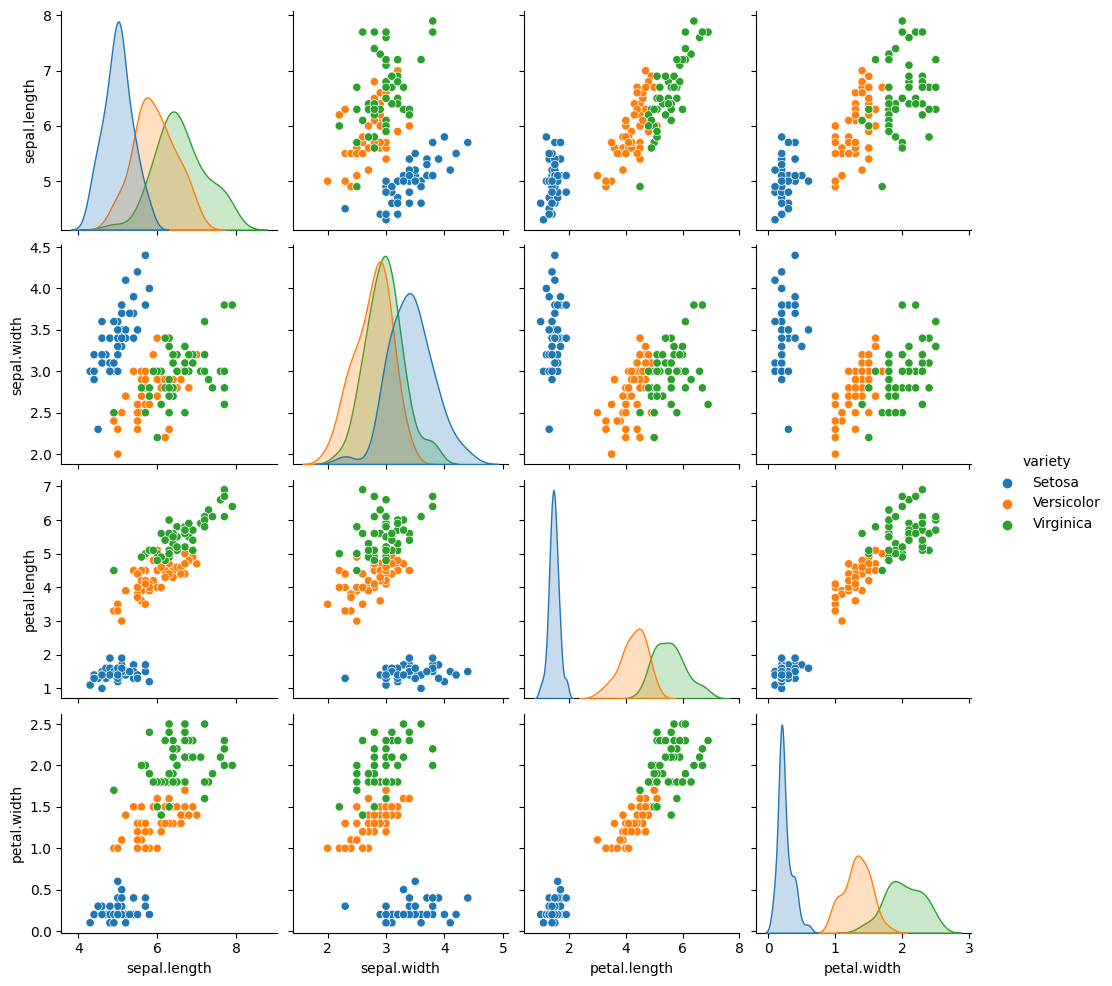

In [18]:
sns.pairplot(iris, hue='variety')

Tras representar los datos del iris dataset podemos observar las siguientes relaciones:
- La longitud del sépalo y el ancho del sépalo tienen una relación lineal positiva.
- Los datos de la variedad Setosa están separados de los de las otras dos variedades.
- Los datos de la variedad Virgínica están poco separados de los de la variedad Versicolor, no obstante en la mayoría de casos, se puede distinguir entre una y otra.

# 5. Histograma de los atributos <a class="anchor" id="histograma"></a>
Realice un histograma de los atributos de entrada y la variable
objetivo.

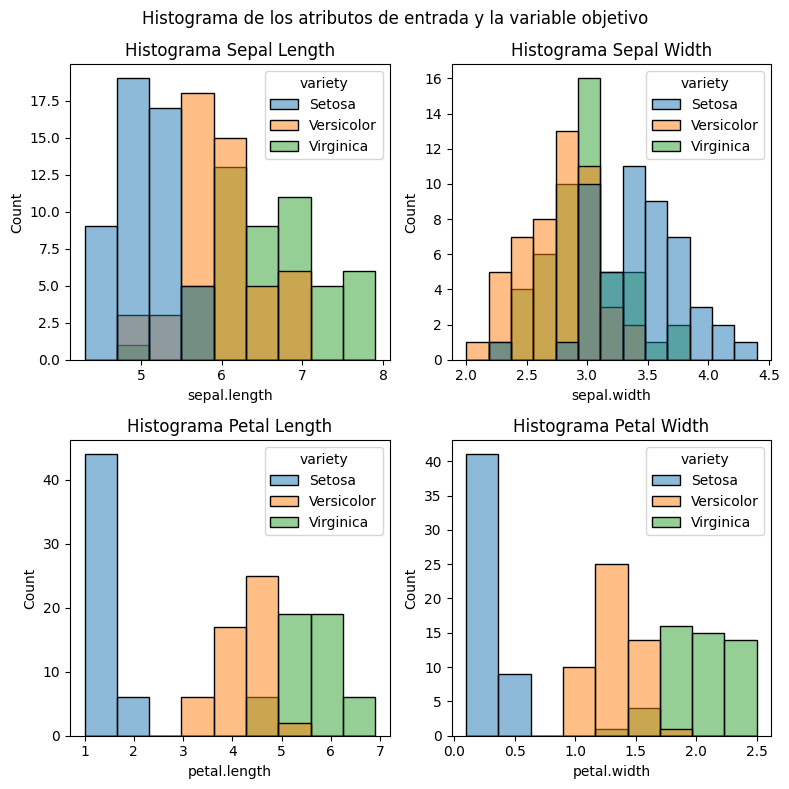

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Histograma de los atributos de entrada y la variable objetivo')
sns.histplot(data=iris, x='sepal.length', hue='variety', ax=axs[0, 0]).set(title='Histograma Sepal Length')
sns.histplot(data=iris, x='sepal.width', hue='variety', ax=axs[0, 1]).set(title='Histograma Sepal Width')
sns.histplot(data=iris, x='petal.length', hue='variety', ax=axs[1, 0]).set(title='Histograma Petal Length')
sns.histplot(data=iris, x='petal.width', hue='variety', ax=axs[1, 1]).set(title='Histograma Petal Width')
fig.tight_layout()
plt.show()

# 6. Recuperar valores perdidos <a class="anchor" id="recuperar"></a>
¿Qué técnica utilizaría para recuperar los valores perdidos? En caso de que exista, apliquela

Existen diferentes mecanismos detrás de la pérdida de datos, estos mecanismos son:
- **MCAR (Missing Completely at Random)**: Los valores perdidos son independientes de los valores observados y de cualquier otra información.
- **MAR (Missing at Random)**: Los valores perdidos son independientes de los valores observados, pero no de otras variables.
- **MNAR (Missing Not at Random)**: Los valores perdidos no son independientes de los valores observados ni de otras variables.

Algunas de las técnicas que se pueden emplear para tratar con los datos faltantes se dividen en dos grupos, los descartes y las imputaciones.

**Descartes:**
- **Eliminación de la lista (listwise deletion)**: Se eliminan todas las filas que contienen algún valor perdido.
- **Eliminación de la observación (pairwise deletion)**: Se eliminan las casillas con el dato faltante.

**Imputaciones:**
Dentro de las imputaciones, se pueden distinguir dos tipos:
- **Imputaciones Simples**: Usa un algoritmo para hacer una única estimación y el valor obtenido se usa para reemplazar el dato faltante correspondiente
- **Imputaciones Múltiples**: Se hacen múltiples estimaciones, que luego se combinan para producir un único valor, que será el usado para reemplazar el dato faltante correspondiente

Las técnicas de imputación simples más utilizadas son:
- **Imputación por la media**: Se sustituye el valor perdido por la media de la variable.
- **Imputación por la mediana**: Se sustituye el valor perdido por la mediana de la variable.
- **Imputación por regresión**: Se sustituye el valor perdido por el valor estimado por una regresión lineal.
- **Imputación hot-deck**: Se sustituye el valor perdido por el valor de una observación similar. El método más utilizado es el de k-vecinos o kNN por sus siglas en inglés (k-nearest neighbors).

**Una de las técnicas de imputación múltiple más utilizadas es el algoritmo MICE (Multivariate Imputation by Chained Equations)**.

En este algoritmo, de forma iterativa, se harán progresivamente cada vez mejores estimaciones de los datos faltantes. Inicialmente la primera estimación no es muy buena, pues se hace con la imputación por la media que vimos anteriormente, pero en los pasos restantes se aplica una regresión lineal entre pares consecutivos de columnas, y el procedimiento se repite una y otra vez hasta completar un número pre-definido de iteraciones. La idea es que progresivamente las estimaciones sean cada vez más precisas y se acerquen más y más al valor real

Al tratarse de un set de datos relativamente pequeño (150 filas), se utilizaría la técnica de imputación simple por la media para rellenar los valores perdidos.

Primeramente comprobaremos si dentro del dataset existen valores perdidos, para ello utilizaremos la función de contar valores perdidos.

In [20]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Al no existir ningún valor perdido, no es necesario aplicar ninguna técnica para recuperar los valores perdidos.

# 7. ¿Es un dataset balanceado? <a class="anchor" id="balanceado"></a>

Para comprobar si el dataset es balanceado, se utilizará la función para contar el número de valores que tiene cada variable objetivo.

In [21]:
iris['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

En este caso, el dataset está balanceado, ya que todas las variables objetivo tienen el mismo número de valores.